In [2]:
import pandas as pd

/tmp/ipykernel_9137/4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df = pd.read_json('RU_dataset.json')

In [4]:
df = df.rename(columns={0:'Texts', 1:'Annotation'})

In [5]:
with pd.option_context('display.max_colwidth', None):
    display(df.sample(5))

,Texts,Annotation
2790,"Онлайн школа. Онлайн-школа — это смешно, я ее очень ненавижу, не буду врать. Я думаю, что школа стала намного сложнее, и учителя просто продолжают работать, работать, работать. А ответы на любые вопросы занимают день или больше. Как человек, который задает массу вопросов, это снижает мои оценки.\n\nК сожалению, мы ничего не можем сделать, поэтому я посылаю любовь и надежду всем, у кого такие же проблемы.",non-suicide
42522,"Никто больше не любит ту же музыку, как и Эминем и Linkin Park. Там потрясающе, я не знаю, почему они не нравятся моим друзьям",non-suicide
47237,"Слушая песню Адама от Blink 182, я всегда плачу. Напоминает мне о времени, когда я пытался совершить поступок.",non-suicide
46282,"Завтра мой день рождения. Завтра мой последний день жизни. Как многие из вас знают, я отсчитываю время до своего дня рождения, потому что точно решил, что это тот самый день. Я думаю, это будет довольно легко, потому что завтра я уже буду чувствовать себя дерьмово, потому что большинство меня не поздравят с днем ​​рождения, и у меня нет планов на завтра. Я до сих пор не определился со своим методом. Но да, завтра 11 июня.",suicide
3838,"Цитата дня. «Небеса — это очередная ложь! А если ты в это веришь, то ты идиот!»",non-suicide


In [6]:
df['Annotation'].unique()

array(['suicide', 'non-suicide'], dtype=object)

In [7]:
df['Target'] = df['Annotation'].apply(lambda x: 1 if x=='suicide' else 0)
df

,Texts,Annotation,Target
0,Бывшая жена угрожает самоубийством Недавно я н...,suicide,1
1,"Я странный? На меня не влияют комплименты, есл...",non-suicide,0
2,Наконец-то 2020 год почти закончился... Так чт...,non-suicide,0
3,"мне нужна помощь, просто помоги мне, я так плачу",suicide,1
4,"Я так растеряна. Здравствуйте, меня зовут Адам...",suicide,1
...,...,...,...
47992,"Я только что увидел забавный мем, прежде чем п...",suicide,1
47993,"Я боюсь, мне некому рассказать. У меня инфекци...",non-suicide,0
47994,"Педофилия, членовредительство и мысли о самоуб...",suicide,1
47995,Я больше не могу справляться. Почти 2 месяца н...,suicide,1


## Data analysis and preprocessing

In [8]:
df['Annotation'].value_counts()

Annotation
non-suicide    24081
suicide        23916
Name: count, dtype: int64

In [9]:
df['Texts'].isnull().any()

False

In [10]:
df[df['Texts'] == '']

,Texts,Annotation,Target


In [12]:
df = df.drop_duplicates(subset=['Texts'])

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
plt.style.use('seaborn-v0_8')

<Axes: title={'center': 'Data balance'}>

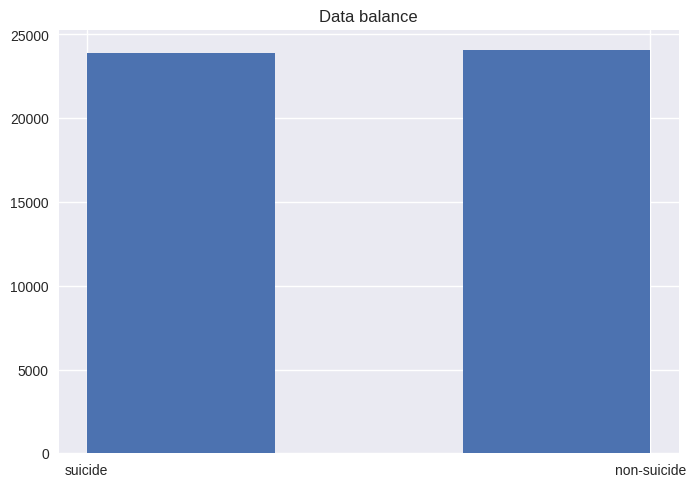

In [32]:
plt.figure()
plt.title('Data balance')
df['Annotation'].hist(bins=3)